# 🤔 **<span style="color:#6dad36">CA</span><span style="color:#d5579d">CHAi?</span> package** 📊
### `Notebook`: _Chord Diagrams_

---

## ⚙️ Installation

(**NOTE**: This is a testing version)

> `pip install -i https://test.pypi.org/simple/ cachai`

If we are using cachai directly from the source code in GitHub (package not installed via `pip`), then
we need to add the root directory of **CACHAi**.

<span style="color:#ff2c2c">**Do not run the cell below if you have installed the package via `pip`**</span>❗

In [1]:
import sys
import os

cachai_root = os.path.abspath(os.path.join('..', '..'))
sys.path.append(cachai_root)

## 🧾 Imports

In [ ]:
import numpy as np
import pandas as pd
from   matplotlib import pyplot as plt
from   cachai import chplot as chp
from   cachai import utilities as util

For now, `chplot` contains everything needed to plot Chord Diagrams.
In the future, `chplot` will be the module that connects with the rest of the plots/tools, which will be split into separate files

---

## 🔠 **Correlation matrix**

For this example, we use the data from `li_correlations.csv`
(obtained from [M. L. L. Dantas et al. 2025](https://www.aanda.org/articles/aa/full_html/2025/04/aa53034-24/aa53034-24.html)).
Any dataset can be used, but the correlation matrix must be provided as an `ndarray`.

In [3]:
# Read the .csv as a data frame
df = pd.read_csv('li_correlations.csv')

# Obtain the data of interest
data = df.iloc[:, [i for i in range(1,9)]]

# Correlation matrix
corr_matrix = data.corr(method='spearman')

In [4]:
corr_matrix

,[Fe/H],A(Li),Age,M,T$_{eff}$,e,Z$_{max}$,$L_z$
[Fe/H],1.000000,-0.340650,-0.208923,0.299946,-0.280956,0.033237,-0.218052,-0.269273
A(Li),-0.340650,1.000000,-0.417049,0.406327,0.792213,-0.067330,0.046326,0.098211
Age,-0.208923,-0.417049,1.000000,-0.876676,-0.553685,0.101717,0.117439,0.007119
M,0.299946,0.406327,-0.876676,1.000000,0.557125,-0.014552,0.020820,-0.134426
T$_{eff}$,-0.280956,0.792213,-0.553685,0.557125,1.000000,-0.052244,0.070041,0.099788
e,0.033237,-0.067330,0.101717,-0.014552,-0.052244,1.000000,0.199433,-0.330512
Z$_{max}$,-0.218052,0.046326,0.117439,0.020820,0.070041,0.199433,1.000000,0.091320
$L_z$,-0.269273,0.098211,0.007119,-0.134426,0.099788,-0.330512,0.091320,1.000000


In [5]:
# Transform the matrix to ndarray
corr_matrix = corr_matrix.to_numpy()

In [6]:
corr_matrix

array([[ 1.        , -0.34065038, -0.20892286,  0.29994554, -0.2809563 ,
         0.03323719, -0.21805159, -0.26927295],
       [-0.34065038,  1.        , -0.41704923,  0.40632697,  0.79221308,
        -0.06733031,  0.04632604,  0.09821122],
       [-0.20892286, -0.41704923,  1.        , -0.87667557, -0.55368513,
         0.10171654,  0.11743935,  0.00711886],
       [ 0.29994554,  0.40632697, -0.87667557,  1.        ,  0.55712487,
        -0.01455239,  0.02082047, -0.1344264 ],
       [-0.2809563 ,  0.79221308, -0.55368513,  0.55712487,  1.        ,
        -0.0522437 ,  0.07004073,  0.09978811],
       [ 0.03323719, -0.06733031,  0.10171654, -0.01455239, -0.0522437 ,
         1.        ,  0.19943262, -0.33051181],
       [-0.21805159,  0.04632604,  0.11743935,  0.02082047,  0.07004073,
         0.19943262,  1.        ,  0.09131998],
       [-0.26927295,  0.09821122,  0.00711886, -0.1344264 ,  0.09978811,
        -0.33051181,  0.09131998,  1.        ]])

We can also define the names and colors for each parameter.

In [7]:
names  = ['[Fe/H]', 'A(Li)', r'$\overline{t}_{\star}$', 'M', r'T$_{eff}$', 'e', r'Z$_{max}$', r'L$_z$']
colors = ['#9c27b0','#4285f4','#ea4335','#fbbc05','#34a853','#8bc34a','#ff9800','#3949ab']

## 📊 **Chord Diagram**

To create a chord diagram, we just instantiate `chp.ChordDiagram()`.
A chord diagram consists of two primary elements:

1. **Nodes**: Represent matrix parameters as arc segments along the circumference (proportional to their weights).
2. **Chords**: Display correlations as links between nodes (width scales with correlation strength).


### Example: Basic diagram

The only mandatory attribute for `ChordDiagram` is the correlation matrix. This example shows the default plot:

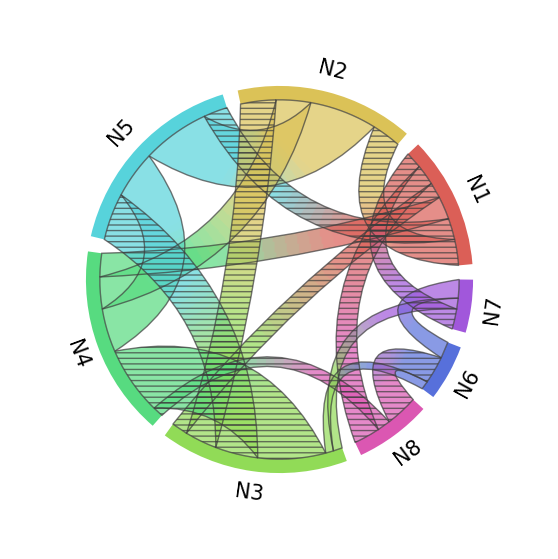

In [8]:
plt.figure(figsize=(7,7))
chp.ChordDiagram(corr_matrix)


### Example: Adding a correlation sign legend

This demonstrates how to add a legend distinguishing positive and negative correlations using `legend=True`.

(to check other customizable parameters see the section below called "_Examples: Customization_")

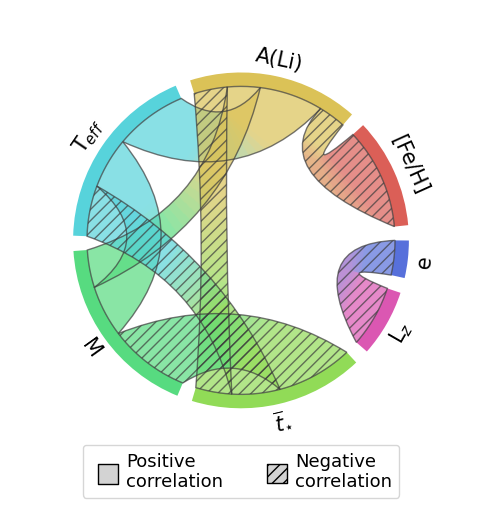

In [9]:
plt.figure(figsize=(6,6),facecolor='w')

chp.ChordDiagram(corr_matrix,
                 names=names,
                 threshold=0.3,
                 negative_hatch='///',
                 legend=True,
                 rasterized=True)

plt.legend(loc='center',bbox_to_anchor=[0.5,0],ncols=2,fontsize=13,handletextpad=0)
#util.save_func('ChordDiagram_example_legend') # Save figure
plt.show()


### Example: Different scales for chords thickness

This example demonstrates how to adjust chord widths using either linear or logarithmic scaling via `scale='linear'` or `scale='log'`.
The logarithmic scale option is particularly useful for visualizing the difference between strong and weak correlations,
making the strongest correlations stand out even more.

(to check other customizable parameters see the section below called "_Examples: Customization_")

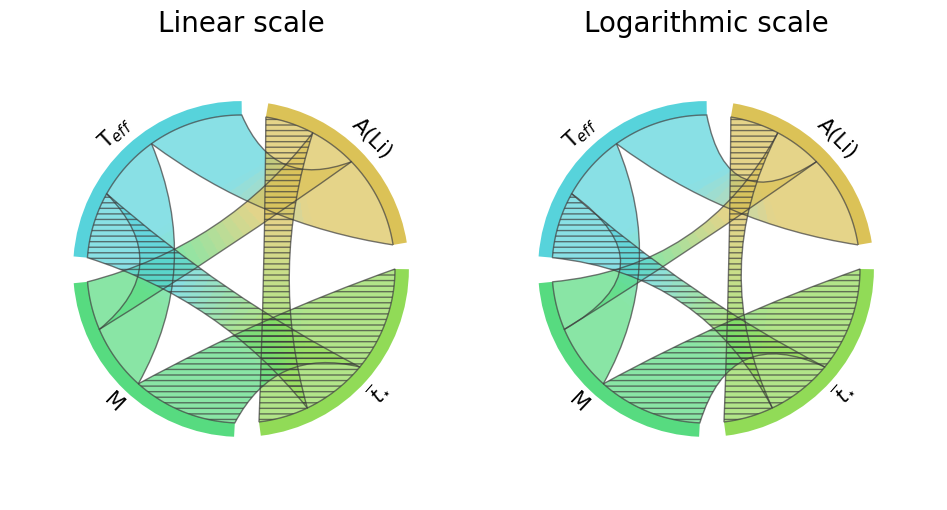

In [10]:
fig, ax = plt.subplots(1,2,figsize=(12,6),facecolor='w')

# -- Linear scale ---------------------------------------------------------------------------------
chp.ChordDiagram(corr_matrix,
                 ax=ax[0],
                 names=names,
                 threshold=0.4,
                 scale='linear',
                 rasterized=True)
ax[0].set_title('Linear scale',fontsize=20,pad=0)

# -- Log scale ------------------------------------------------------------------------------------
chp.ChordDiagram(corr_matrix,
                 ax=ax[1],
                 names=names,
                 threshold=0.4,
                 scale='log',
                 rasterized=True)
ax[1].set_title('Logarithmic scale',fontsize=20,pad=0)

# -------------------------------------------------------------------------------------------------
plt.subplots_adjust(wspace=0)

#util.save_func('ChordDiagram_example_scales') # Save figure
plt.show()


### Examples: Customization

This example demonstrates three variations of chord diagrams (using the same correlation matrix) displayed in subplots.
Each version has these specific adjustments:

- **Example 1:**
    - Label nodes: `names=names`
    - Bitmap rendering  for vector graphics: `rasterized=True`
    
- **Example 2:**
    - Spacing: `node_gap=0.02`
    - Chord transparency: `chord_alpha=0.3`
    - Negative correlation hatch: `negative_hatch='oo'`
    - Custom font: `font={'family': 'serif', 'size': 17}`
    - Highlights correlation: Use `ChordDiagram` collections

- **Example 3:**
    - Custom node colors: `colors=colors`
    - Disable color blending: `blend=False`
    - Filter weak correlations: `threshold=0.4`
    - Control chord radius: `max_rho_radius=0.5`
    - Set log-scaled chords: `scale='log'`
    - Control node labels pads: `node_labelpad=0.3`
    - Adjust widths:
        - Nodes: `node_linewidth=20`
        - Chord edges: `chord_linewidth=1.5`
    - Larger labels: `fontsize=20`
    - Add legend labels: `legend=True`

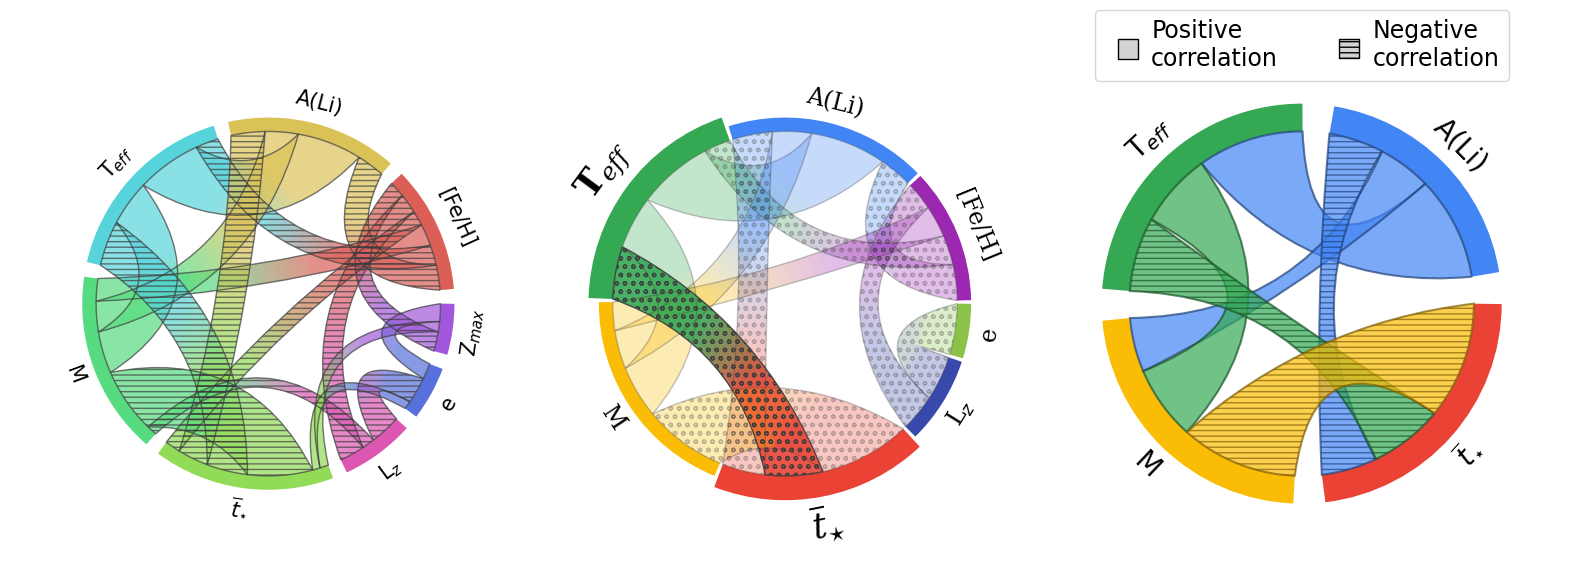

In [11]:
fig, ax = plt.subplots(1,3,figsize=(20,7),facecolor='w')

# -- Example 1 ------------------------------------------------------------------------------------
chp.ChordDiagram(corr_matrix,
                 ax=ax[0],
                 names=names,
                 rasterized=True)

# -- Example 2 ------------------------------------------------------------------------------------
chord_plot = chp.ChordDiagram(corr_matrix,
                 ax=ax[1],
                 names=names,
                 colors=colors,
                 threshold=0.25,
                 node_gap=0.02,
                 chord_alpha=0.3,
                 negative_hatch='oo',
                 font={'family':'serif','size':17},
                 rasterized=True)

for n in [2,4]:
    chord_plot.node_labels[n].set_font({'size':25,
                                        'weight':'bold',
                                        'family':'serif',
                                        'math_fontfamily':'dejavuserif'})
    chord_plot.node_labels[n].set_pad(0.3)
    chord_plot.node_patches[n].set_linewidth(35)
chord_plot.chord_patches[2][-1].set_alpha(0.9)
chord_plot.chord_blends[2][-1].set_alpha(0.9)

# -- Example 3 ------------------------------------------------------------------------------------
chp.ChordDiagram(corr_matrix,
                 ax=ax[2],
                 names=names,
                 colors=colors,
                 blend=False,
                 threshold=0.4,
                 max_rho_radius=0.5,
                 scale='log',
                 node_linewidth=20,
                 chord_linewidth=1.5,
                 node_labelpad=0.3,
                 fontsize=20,
                 show_axis=False,
                 legend=True,
                 rasterized=True)
ax[2].legend(loc='center',bbox_to_anchor=[0.5,1],ncols=2,fontsize=17,handletextpad=0)

# -------------------------------------------------------------------------------------------------
plt.subplots_adjust(wspace=0)

#util.save_func('ChordDiagram_example_custom') # Save figure
plt.show()

---
